# Lignes de niveau, Projet Maths Info
## Augustin Jacquillat 
## Louis Perrotin

## Présentation du projet 

Le projet que nous avons réalisé consiste en l'écriture de fonctions Python qui doivent permettrent de réaliser la tracé de lignes de niveau pour des fonctions de R² dans R. 

Pour ce faire, nous avons séparé en deux grandes étapes le travail à fournir: 
    1. Ecrire une fonction qui réalise le tracé de ces lignes dans un cas simple 
    2. Ecrire une fonction qui prend en arguments une fonction de R² dans R et un ensemble d'intervalles sur lesquels on pourra lancer la fonction précédement définie

## Démarche(s)

Nous avons mis en oeuvre plusieurs méthodes pour l'écriture de la fonction simple_contour. 
L'idée commune à ces méthodes est de procéder de proche c'est a dire que la donnée d'un point conduit à l'obtention du point suivant. 

Il nous faut donc un premier point que nous trouvons avec la fonction find_seed.

Une fois ce point trouvé, plusieurs méthodes sont utilisées pour déterminer le point suivant:
    1. Une méthode en utilisant le théorème des fonction  implicites 
    2. Une méthode en utilisant la caractérisation par le gradient 
    
n.b.: nous avons pensé un instant à apppliquer sur tout l'espace des x la fonction find_seed avant de comprendre que cette méthode serait trop lourde et innefficace (cf.plus loin)

# 0.Fonction find_seed

## 0.1. Fonction find_seed : l'idée
## 0.2. Fonction find_seed : le code
## 0.3. Fonction find_seed : exemple d'utilisation

## 0.1. Fonction find_seed : l'idée

Soit f: R ² $\to$ R la fonction dont on veut tracer les lignes de niveau. 
On rappelle que par hypothèse, f est de classe au moins $C^1$.


Il nous faut trouver à un x fixé un y qui appartient à notre ligne de niveau . Une condition raisonnable pour l'existence de ce y est que c soit compris entre f(x,a) et f(x,b). 

Pour déterminer une valeur satisfaisante de y, on procède par dichotomie. 

Il est a noter que notre fonction renvoie un y qui fonctionne mais pas tous les y qui fonctionnent. 

On comprend donc que la méthode "naïve" qui consiste à appliquer pour un grand nombre d'abscisses x la fonction find_seed est mauvaise car find_seed ne renvoie pas forcément une valeur (si les hypothèses du TVI ne sont pas respectées) et quand bien même elle en renverrait une, elle n'en renverrait jamais qu'une (impossible de détécter plus d'un point pas abscisse).

## 0.2. Fonction find_seed : le code

In [3]:
##On importe une fois pour toutes tous les modules nécessaires dans la suite du projet 

import autograd
from autograd import numpy as np
from math import sqrt
import pylab as pl
import matplotlib.pyplot as plt

#la fonction 

def find_seed(g, c=0., eps=2**-26):
    a=0
    b=1
    milieu=(b+a)/2
    if (g(a)>c and g(b)>c) or (g(a)<c and g(b)<c):
        return None
    while (b-a)/2>eps:
        if (g(milieu)-c)*(g(a)-c)<=0:
            b=milieu
        else:
            a=milieu
        milieu=(b+a)/2
    return milieu



## 0.2. Fonction find_seed : exemple d'utilisation 

In [10]:

f=lambda x,y:(x**2+y**2)*1.0   ##La multiplication par 0.1 permet de s'assurer du type flotant de f(x,y)

def g(x):
        return f(0,x)

print (find_seed(g,1)-np.sqrt(1))#On affiche la différence entre la valeur obtenue par 
                                               #l'algorithme et la valeur théorique fournie par numpy 


-1.4901161193847656e-08


On note que l'erreur obtenue est de l'ordre de $10^{-10}$ ce qui correpond à peu près au $\varepsilon$ fixé sachant qu'il y a aussi une erreur sur le calcul de numpy  

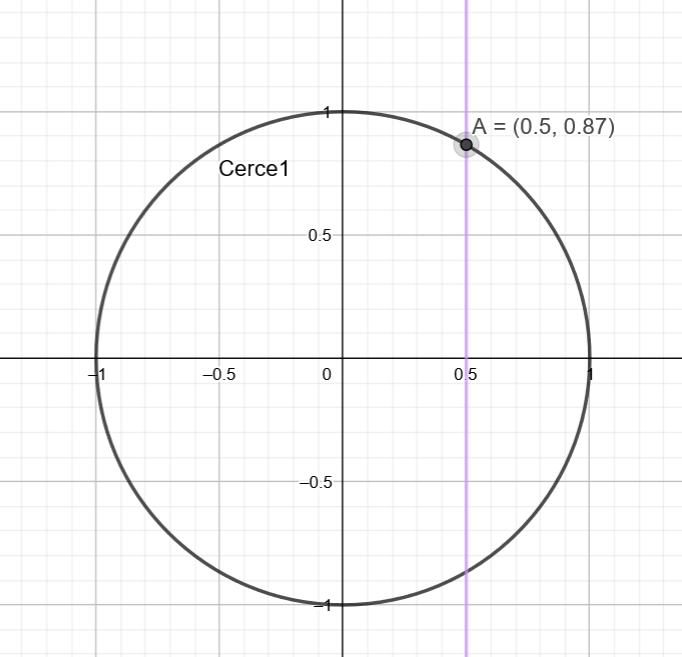

# 1. La fonction simple contour 

## 1.1. La fonction simple contour : théorème des fonctions implicites 
#### 1.1.a. La fonction simple contour : théorème des fonctions implicites : l'idée
#### 1.1.b. La fonction simple contour : théorème des fonctions implicites : le code
#### 1.1.c. La fonction simple contour : théorème des fonctions implicites : un exemple
#### 1.1.d. La fonction simple contour : théorème des fonctions implicites : limites 

# 1.1. La fonction simple contour : théorème des fonctions implicites 

## 1.1.a. La fonction simple contour : théorème des fonctions implicites : l'idée

Nous avons trouvé, en supposant qu'il existe, grâce à la fonction find_seed() une point de départ qui vérifie f(0,$y_0$)=c.
A partir de ce point nous allons essayer d'en construire un autre qui soit sur la ligne de niveau. 

Nous étudions une fonction f:R²->R et nous voulons déterminer la ligne de niveau c. 
On pose donc g:=f-c$*$id et on étudie les $zéros$ de la fonction g.

Les mathématiques (le théorème des fonctions implictes) nous affirment que si $g(x_0,y_0)=0$ et que sa dérivée partielle selon la coordonée $x_i$ est non nulle (ce qui correpond à une différentielle partielle inversible car on travaille dans R²), alors on peut au voisinage du point  $(x_0,y_0)$ définir une fonction $\phi$ continuement différentiable telle que $\phi(x_j)=x_i\iff g(x_i,x_j)=0$ (remarque, le couple $(x_i,x_j)$ désigne soit le couple (x,y) soit le couple (y,x)). On connait même dans ce cas 

C'est forts de cette connaissance que nous choisissons de déterminer le point $(x_1,y_1)$ proche de $(x_0,y_0)$ à $\delta$ en décalant x (ou respectivement y) d'une quantitée $\delta$' (que nous expliciterons plus tard). On suppose que la différentielle partielle de g selon y est non nulle en $(x_0,y_0)$ (correspond au cas 1 dans le programme cf.diapositives suivantes) (ou respecetivement celle en x). On est alors assuré que le point suivant vérifie  $\underline{\phi(x_1)=y_1}$ (ou symétriquement en y et x). 


On écrit maintenant $x_1=x_0+\delta$. Ainsi, $y_1=\phi(x_1)=y_0+d\phi(x_0).\delta'+o(\delta')$ ce qui donne au premier ordre en $\delta$' une valeur du prochain point. 

Détermions $\delta$' pour que les deux points trouvés soient distants de $\delta$ exactement. 
On choisit $\delta$'=$\frac{\delta}{\sqrt{1+d\phi(x_0)^2}}$ et on a alors directement les points espacés de $\delta$.

## 1.1.b. La fonction simple contour : théorème des fonctions implicites: le code 

In [4]:
def grad_f(x,y):
    g=autograd.grad
    return np.r_[g(f,0)(x,y),g(f,1)(x,y)]

def prochain_point(f,x,y,delta=0.01):
    grad=grad_f(x,y)
    if grad[1]!=0: #Cas 1 (cf. diapositive introductive)
        d_phi=-grad[0]/grad[1]
        delta2=delta/sqrt(1+d_phi**2)
        return (x+delta2, y+d_phi*delta2)
    elif grad[0]!=0: #Cas 2 (cf. diapositive introductive)
        d_phi=-grad[1]/grad[0]
        delta2=delta/sqrt(1+d_phi**2)
        return (x+d_phi*delta2,y+delta2)
    else:
        return None
        

## 1.1.b. La fonction simple contour : théorème des fonctions implicites: le code 

In [10]:
def simple_contour1(f, c=0., delta=0.01):
    def g(x):
        return f(0,x)
    t=find_seed(g,c)
    if t==None:
        return ([],[])
    else:
        les_x=[0.]
        les_y=[t]
        
        while ((1-les_x[-1])>delta/2 and (1-les_y[-1])>delta/2 and (les_x[-1])>delta/2 and (les_y[-1])>delta/2) or (abs(les_x[0]-les_x[-1])<delta/2 or abs(les_y[0]-les_y[-1])<delta/2)  :
            point=prochain_point(f,les_x[-1],les_y[-1],delta)
            les_x.append(point[0])
            les_y.append(point[1])
        return (les_x,les_y)
    


## 1.1.c. La fonction simple contour : théorème des fonctions implicites: un exemple 

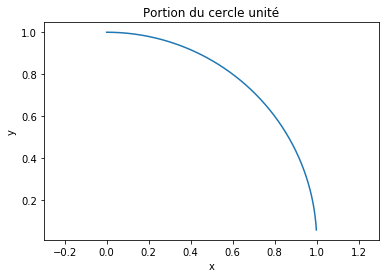

In [12]:
f=lambda x,y:(x**2+y**2)*1.0

couples=simple_contour1(f,1.0,0.001)

pl.plot(couples[0],couples[1])
pl.axis("equal")
pl.xlabel('x')
pl.ylabel('y')
pl.title('Portion du cercle unité')
pl.show()

## 1.1.d. La fonction simple contour : théorème des fonctions implicites: limites 

## 1.2. La fonction simple contour : caractérisation par le gradient 
#### 1.2.a. La fonction simple contour : caractérisation par le gradient  : l'idée
#### 1.2.b. La fonction simple contour : caractérisation par le gradient : le code
#### 1.2.c. La fonction simple contour : caractérisation par le gradient  : un exemple

## 1.2.a. La fonction simple contour : caractérisation par le gradient : l'idée 

Contrairement à la méthode mise en oeuvre précédemment, la méthode que nous allons proposer peut traiter le problème du déplacement à droite ou à gauche de x. 

Une propriété des lignes de niveau est d'être en tout point orthogonales au gradient de la fonction. 
C'est forts de cette connaissance que nous choisissons de déterminer le point $(x_1,y_1)$ proche de $a=(x_0,y_0)$ à $\delta$ en écrivant à l'orde 1 en $\delta$': $(x_1,y_1)\approx(x_0+\partial_yf(a).\delta',y_0-\partial_xf(a).\delta')$ 

On trouve alors $\delta$'=$\frac{\delta}{\sqrt{1+\mid\mid grad(f)\mid\mid^2}}$ 

De cette expression approchée on peut trouver un bon point de départ pour une méthode de calcul plus lourde mais qui nous approche d'avantage du vrai point, la méthode de Newton en 2D. 


## 1.2.b. La fonction simple contour : caractérisation par le gradient : le code 

In [12]:
def newton(f,c,x,y,eps=2**-26):
    def g(x,y):
        return f(x,y)-c
    # g va nous permettre de se ramener à la recherche d'un point fixe
    def J_g(x,y):
        j=autograd.jacobian
        return np.c_[j(g,0)(x,y),j(g,1)(x,y)]
    J=J_g(x,y)
    #la jacobienne est ici un vecteur à deux composantes
    while g(x,y)>eps:
        #on arrête la boucle quand on est à esp du point fixe (même précision que find_seed)
        a=np.array((x,y))        
        a=a-J*g(x,y)
        x=a[0,0]
        y=a[0,1]
    return (x,y)

## 1.2.b. La fonction simple contour : caractérisation par le gradient : le code 

In [13]:
def simple_contour2_1(f,c=0.0,delta=0.01):
    def grad_f(x,y):
        g=autograd.grad
        return np.r_[g(f,0)(x,y),g(f,1)(x,y)]
    les_x=[0.0]
    delta2=delta/2 #Pour que les conditions d'arrêt soient telles que l'on s'arrête bien
                    # à moins de delta du bord du carré
    g=lambda y:f(0,y)
    les_y=[find_seed(g,c)]
    if les_y[0]==None:
        return ([],[])
    elif grad_f(les_x[0],les_y[0])[1]>=0 :
        while ((1-les_x[-1])>delta2 and (1-les_y[-1])>delta2 and (les_x[-1])>delta2 and (les_y[-1])>delta2) or (abs(les_x[0]-les_x[-1])<delta2 or abs(les_y[0]-les_y[-1])<delta2)  :
            grad=grad_f(les_x[-1],les_y[-1])
            delta1=delta/(np.sqrt(grad[1]**2+grad[0]**2))
            '''
            On applique une petite correction à delta pour s'assurer que deux points successifs sont bien à une 
            distance delta l'un de l'autre.
            '''
            a=newton(f,c,les_x[-1]+grad[1]*delta1,les_y[-1]-grad[0]*delta1)
            les_x.append(a[0])
            les_y.append(a[1])
            '''
            On utilie la méthode de Newton pour redresser l'erreur dûe à l'approximation faite 
            par le calcul avec le gradient (où l'on prend la droite tangente)
            '''
        return les_x,les_y
    else :
        f1=lambda x,y:-f(x,y)
        def grad_f1(x,y):
            g=autograd.grad
            return np.r_[g(f1,0)(x,y),g(f1,1)(x,y)]
        les_x=[0.0]
        g=lambda y:f1(0,y)
        les_y=[find_seed(g,-c)]
        while ((1-les_x[-1])>delta2 and (1-les_y[-1])>delta2 and (les_x[-1])>delta2 and (les_y[-1])>delta2) or (abs(les_x[0]-les_x[-1])<delta2 or abs(les_y[0]-les_y[-1])<delta2)  :
            grad=grad_f1(les_x[-1],les_y[-1])
            delta1=delta/(np.sqrt(grad[1]**2+grad[0]**2))
            a=newton(f1,-c,les_x[-1]+grad[1]*delta1,les_y[-1]-grad[0]*delta1)
            les_x.append(a[0])
            les_y.append(a[1])
        return les_x,les_y

## 1.2.b. La fonction simple contour : caractérisation par le gradient : le code 

Au vu de la fonction contour_complexe fournie, on peut se passer de la disjonction de cas sur la gradient. 

In [14]:
def simple_contour(f,c=0.0,delta=0.01):
    def grad_f(x,y):
        g=autograd.grad
        return np.r_[g(f,0)(x,y),g(f,1)(x,y)]
    les_x=[0.0]
    delta2=delta/2#Pour que les conditions d'arrêt soient telles que l'on s'arrête bien
                    # à moins de delta du bord du carré
    g=lambda y:f(0,y)
    les_y=[find_seed(g,c)]
    if les_y[0]==None:
        return ([],[])
    while ((1-les_x[-1])>delta2 and (1-les_y[-1])>delta2 and (les_x[-1])>delta2 and (les_y[-1])>delta2) or (abs(les_x[0]-les_x[-1])<delta2 or abs(les_y[0]-les_y[-1])<delta2)  :
        grad=grad_f(les_x[-1],les_y[-1])
        delta1=delta/(np.sqrt(grad[1]**2+grad[0]**2))
        '''
            On applique une petite correction à delta pour s'assurer que deux points successifs sont bien à une 
            distance delta l'un de l'autre.
        '''
        a=newton(f,c,les_x[-1]+grad[1]*delta1,les_y[-1]-grad[0]*delta1)
        les_x.append(a[0])
        les_y.append(a[1])
        '''
        On utilie la méthode de Newton pour redresser l'erreur dûe à l'approximation faite 
        par le calcul avec le gradient 
        '''
    return les_x,les_y

## 1.2.c. La fonction simple contour : caractérisation par le gradient : un exemple 

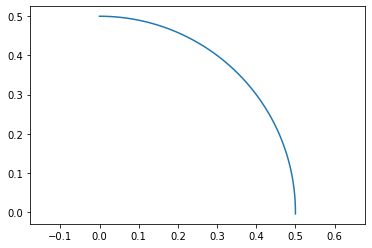

In [15]:
f=lambda x,y:((x)**2+(y)**2)-.5**2
     
a=simple_contour(f,c=0.)        
X=a[0]
Y=a[1]
pl.plot(X,Y)
pl.axis("equal")
pl.show()   

# 1.3. Conclusion sur les fonctions simple contour

Nous avons abandonné le développement de la fonction simple contour qui utilisait les fonctions implicites quand nous avons remarqué qu'il était compliqué de savoir de quel côté déplacer x.
Pour résoudre le problème lié à la propagation des erreurs, on aurait pu ajouter la fonction de la méthode de Newton à 2D mais nous ne l'avons pas fait pour la raison ci-dessus ennoncée. 

La méthode utilisant les gradiant s'avère être efficace.

Reste à lui adjoindre la fonction contour_complexe. 

# 2. Fonction contour_complexe et exemple

La fonction contour simple ayant été définie avec succès, il reste à écrire une fonction contour_complexe qui traite les cas autres que les fonction sur [0;1]. Nous utilisons la fonction mise à notre disposition sur le forum discourse (dans la sous diapo, pensez à l'executer)

In [16]:
LEFT, UP, RIGHT, DOWN = 0, 1, 2, 3  # clockwise


def rotate_direction(direction, n=1):
    return (direction + n) % 4


def rotate(x, y, n=1):
    if n == 0:
        return x, y
    elif n >= 1:
        return rotate(1 - y, x, n - 1)
    else:
        assert n < 0
        return rotate(x, y, n=-3 * n)


def rotate_function(f, n=1):
    def rotated_function(x, y):
        xr, yr = rotate(x, y, -n)
        return f(xr, yr)

    return rotated_function


# Complex Contouring
# ------------------------------------------------------------------------------

# Customize the simple_contour function used in contour :
# simple_contour = smart_simple_contour


def contour(f, c, xs=[0.0, 1.0], ys=[0.0, 1.0], delta=0.01):
    curves = []
    nx, ny = len(xs), len(ys)
    for i in range(nx - 1):
        for j in range(ny - 1):
            xmin, xmax = xs[i], xs[i + 1]
            ymin, ymax = ys[j], ys[j + 1]

            def f_cell(x, y):
                return f(xmin + (xmax - xmin) * x, ymin + (ymax - ymin) * y)

            done = set()
            for n in [0, 1, 2, 3]:
                if n not in done:
                    rotated_f_cell = rotate_function(f_cell, n)
                    x_curve_r, y_curve_r = simple_contour(rotated_f_cell, c, delta)
                    exit = None
                    if len(x_curve_r) >= 1:
                        xf, yf = x_curve_r[-1], y_curve_r[-1]
                        if xf == 0.0:
                            exit = LEFT
                        elif xf == 1.0:
                            exit = RIGHT
                        elif yf == 0.0:
                            exit = DOWN
                        elif yf == 1.0:
                            exit = UP
                    if exit is not None:  # a fully successful contour fragment
                        exit = rotate_direction(exit, n)
                        done.add(exit)

                    x_curve, y_curve = [], []
                    for x_r, y_r in zip(x_curve_r, y_curve_r):
                        x, y = rotate(x_r, y_r, n=-n)
                        x_curve.append(x)
                        y_curve.append(y)
                    x_curve = np.array(x_curve)
                    y_curve = np.array(y_curve)
                    curves.append(
                        (xmin + (xmax - xmin) * x_curve, ymin + (ymax - ymin) * y_curve)
                    )
    return curves


# 2. Fonction contour_complexe et exemple

In [ ]:
f1=lambda x,y:2*(np.exp(-x**2-y**2)-np.exp(-(x-1)**2-(y-1)**2)) #la fonction du poly
f2=lambda x,y:((x)**2+(y)**2)-.5**2+np.sin(x*y)*np.cos(2*x**2) #fonction plus rigolote, mais plus complexe à tracer 
print("l'exécution de ces lignes peut-être longue")
xs=np.linspace(-3,4,30)
ys=np.linspace(-3,4,30)
p=2 #p représente les nombre de ligne de niveau que l'on souhaite tracé 
for i in range(p):
    level_curves = contour(f1,0.5-i,xs,ys) 
    for x, y in level_curves:
        plt.plot(x, y, 'r')
        pl.axis("equal")
plt.show()

l'exécution de ces lignes peut-être longue
